### Student Name: Muhammad Munawwar Anwar
### Student ID: ma04289

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(42)
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans


In [2]:
points = []
def initializePoints(count):
     for i in range(int(count/3)):
         points.append([random.gauss(0,10),random.gauss(100,10)])
     for i in range(int(count/3)):
         points.append([random.gauss(-30,20),random.gauss(10,10)])
     for i in range(int(count/3)):
         points.append([random.gauss(30,20),random.gauss(10,10)])

     return points


In [3]:
def random_sample(arr, size):
    return arr[np.random.choice(len(arr), size=size, replace=False)]

In [4]:
def cluster(points,k,visuals = True):
    #Your kmeans code will go here to cluster given points in K clsuters. If visuals = True, the code will also plot graphs to show the current state of clustering
    '''
    1. Specify the number k of clusters to assign
    2. Randonmly initialize k centriods
    3. Repeat
    4.      Assign each point to calculate closet centroid.
    5.      Compute the centriod (mean) of each new cluster
    6. Until the centroid positions do not change
    '''
    np_points = np.array(points)
   
    # Randomnly initialize k centroids.
    CurrentCentroid = random_sample(np_points,k) 
    K_cluster = dict()
    sse_score = 0
    for x in range(k):
        K_cluster[x] = list()
    while True:
        sse_score = 0
        # Assign each point to the closet centroid.
        for i in range(len(np_points)):
            d = dict()
            for j in range(k):
                d[j]= math.sqrt((np_points[i][0] - CurrentCentroid[j][0])**2 + (np_points[i][1] - CurrentCentroid[j][1])**2)
            K_cluster[min(d,key =d.get)].append(np_points[i])
        # Compute the centroid (mean) of each new cluster:
        NewCentroid = np.zeros((k,2))
    
        for y in range(k):
            xsum = 0
            ysum = 0
            count = 0
            for Px,Py in K_cluster[y]:
                xsum = xsum +Px
                ysum = ysum +Py
                count +=1
            NewCentroid[y][0] = xsum/count
            NewCentroid[y][1] = ysum/count  
        CurrentCentroid = NewCentroid
        if (np.sum(CurrentCentroid - NewCentroid) == 0):
            break
        else:
            for x in range(k):
                K_cluster[x] = list()  
    # Plot ALL Clusters on the Map
    if visuals:
        fig=plt.figure(figsize=(5,5))
        ColorMap = {0:"r",1:"g",2:"b"}
        for i in range(len(K_cluster)):
            xvalues = list()
            yvalues = list()
            for val in range(len(K_cluster[i])):
                xvalues.append(K_cluster[i][val][0])
                yvalues.append(K_cluster[i][val][1])

            plt.scatter(xvalues,yvalues,color=ColorMap[i],alpha=0.6,edgecolor='w')
        for c in range(k):
            plt.scatter(NewCentroid[c][0],NewCentroid[c][1],color=ColorMap[c],edgecolor='k')
        plt.show()
 

    return (NewCentroid,K_cluster)

In [5]:
def clusterQuality(clusters):
    score = 0
    results = []
    #Your code to compute the quality of cluster will go here.
    for i in range(len(clusters)):
        
        centroid = clusters[i][0]
        Kcluster = clusters[i][1]
        for j in Kcluster.keys():
            for k in range(len(Kcluster[j])):
                sse = math.sqrt((centroid[j][0] - Kcluster[j][k][0])**2 +   (centroid[j][1] - Kcluster[j][k][1] ) **2)
                score = score + sse**2
        
        results.append(score)
        score = 0
    return min(results)

In [6]:
def keepClustering(points,K,N,visuals):
    clusters = []
    #Write you code to run clustering N times and return the formation having the best quality
    for i in range(N):
        print("Iteration : " + str(i))
        clusters.append(cluster(points,K,visuals))
    
    return clusters
    

In [7]:
initializePoints(1000)

860495],
 [-23.09481132914872, 9.206042277971509],
 [-50.09220276768565, 11.334460346210925],
 [-39.074008449377544, -0.6859704339712565],
 [-23.409959698322233, 7.900217936289774],
 [-6.070336486070978, 16.655320669543343],
 [-15.306573323070626, 13.216666235060606],
 [-46.903559544553104, 0.6437285787165141],
 [-59.42316195382194, 38.79012497563602],
 [-51.58889578305398, 7.901681655445266],
 [-37.20778330873443, 7.189023785719269],
 [-41.68101012692852, -8.68344849270662],
 [-49.963874749863855, -3.9066953022725492],
 [-32.535591819871534, 3.1580059464820165],
 [-43.74360517787195, 12.158792456483956],
 [-41.655701577165104, 19.32094136671814],
 [-37.723595726178885, 12.251567282240078],
 [-56.505934361853605, 16.56873020901939],
 [-38.10366785438548, 14.087580832902805],
 [-23.3998966443774, 8.265568442540644],
 [-25.651217674101474, 6.147035640472127],
 [-3.0778049931749223, 19.342888546843547],
 [-20.350114784025045, -1.8014041505334415],
 [-51.98611311161587, 3.36138430618303],


Iteration : 0


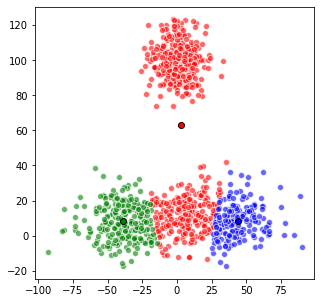

Iteration : 1


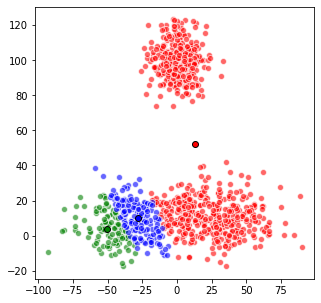

Iteration : 2


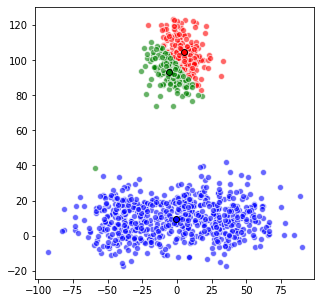

Iteration : 3


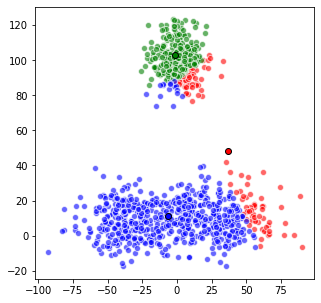

Iteration : 4


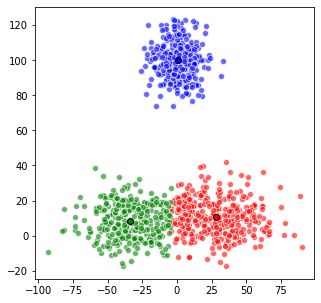

Iteration : 5


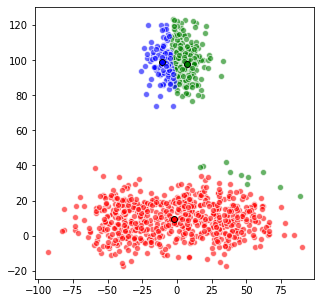

Iteration : 6


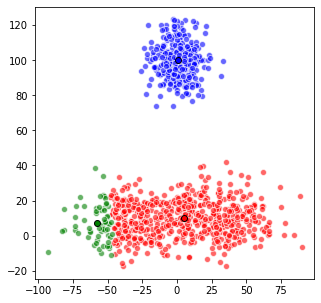

Iteration : 7


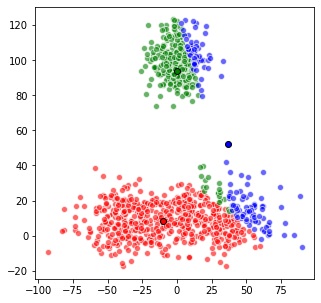

Iteration : 8


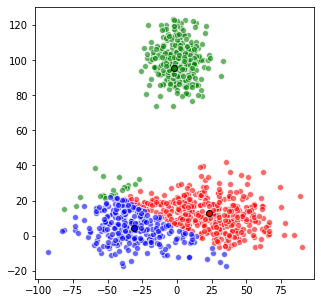

Iteration : 9


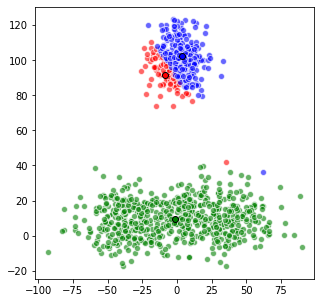

The score of best Kmeans clustering is: 355225.42433058284


In [10]:
K = 3
N = 10
clusters =keepClustering(points,K,N,True)

print ("The score of best Kmeans clustering is:", clusterQuality(clusters))


In [9]:

kmeans = KMeans(init="random",n_clusters=3,n_init=10)
kmeans.fit(points)
print(kmeans.inertia_)

354129.1701141036
